## **MNIST Classification**


In the dynamic domain of machine learning, algorithms serve as instrumental instruments for extracting meaningful insights from data. This report meticulously examines the implementation and analysis of two pivotal algorithms—linear regression and softmax regression.

While linear regression adeptly models relationships between variables, softmax regression serves as an extension of logistic regression, offering a specialized methodology for managing multiclass classification tasks.

Both algorithms are foundational within the realm of supervised learning, possessing unique attributes that contribute to their respective strengths. This exploration aims to elucidate the intricacies of these algorithms, delineating their applications, strengths, and limitations, thereby facilitating a comprehensive understanding of their effieciency in guiding data-driven decision-making.


# **Preparations**

In this segment, the MNIST dataset is going to be loaded, divided, and prepared for use.

The original dataset comprises 70,000 grayscale images, each measuring 28x28 pixels, representing handwritten digits.

Upon retrieval, the dataset will be partitioned into a training set (consisting of 60,000 images along with their respective labels) and a test set (comprising 10,000 images along with their labels).

During preprocessing, the images will be flattened into 1-dimensional vectors, converting each from 28x28 (784 pixels in total) to a single vector, and normalized to the range 0-1.

To implement the bias trick, an additional entry will be appended to every vector within the dataset, resulting in vectors of length 785:

X_train: 60,000 x 785
Y_train: 60,000 x 10
X_test: 10,000 x 785
Y_test: 10,000 x 10

In [ ]:
# Imports
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder


In [ ]:
# Fetch MNIST dataset, and unpack it to images (X) and labels (Y)
def set_data():

    # Import data
    mnist = fetch_openml('mnist_784', version=1)

    # Extract Images and labels
    X = mnist['data'].values
    Y = mnist['target'].to_numpy(dtype=int)

    # Normalize data
    X /= 255.0

    # Add ones vector to implement the 'bias trick'
    X = np.column_stack([np.ones(X.shape[0]), X])

    return X, Y




In [ ]:
# Fetch data and split it into train and test data
X_all, Y_all = set_data()
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=10000)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# **Softmax Regression**

In my implementation for softmax regression on the MNIST dataset on this section, the cornerstone lies in leveraging gradient descent and cross-entropy loss to facilitate effective multi-class classification.
The model utilizes the softmax function to transform raw output scores (W.T*X) into probability distributions across the digit classes.
During the training phase, the cross-entropy loss serves as a crucial metric to quantify the disparity between predicted probabilities and actual class labels. Employing gradient descent as the optimization strategy, the algorithm iteratively refines model parameters to minimize this loss, thereby enhancing the overall classification accuracy.

In [ ]:
# Y_train - 60000X1
# X_train - 60000X785
# W - 785X10

# Implement the softmax function
def softmax(scores):
    exp_scores = np.exp(scores)
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

# Implement the cross entropy loss
def cross_entropy_loss(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred)) / len(y_true)

# Predict labels based on calculated weights using softmax function
def predict(X, W):
        scores = np.dot(X, W)
        y_pred = softmax(scores)
        return y_pred


# Implement the gradient descent algorithm on the softmax function
def gradient_descent(X_train, Y_train, X_test, Y_test, learning_rate=1, epochs=100, W = None, epsilon = 0.1):
    num_samples, num_classes = X_train.shape[0], Y_train.shape[1]

    if W is None:
      # Initialize weights to random values
      W = np.random.randn(X_train.shape[1], num_classes)

    train_losses = []
    test_losses = []
    for epoch in range(epochs):

        # Predict
        y_pred_train = predict(X_train, W)
        y_pred_test = predict(X_test, W)

        # Compute losses
        train_loss = cross_entropy_loss(Y_train, y_pred_train)
        train_losses.append(train_loss)

        test_loss = cross_entropy_loss(Y_test, y_pred_test)
        test_losses.append(test_loss)

        # calculate gradient and the correction factor dW
        gradient = (y_pred_train - Y_train) / num_samples
        dW = np.dot(X_train.T, gradient)

        # Update weights
        W -= learning_rate * dW

        if train_loss < epsilon:
          break

    return W, train_losses, test_losses

In [ ]:
# Parameters and constants
num_classes = 10
num_features = X_train.shape[1]
num_epochs = 600
lr = 1

# Transform Y_train and Y_test to one hot
encoder = OneHotEncoder(sparse=False)
Y_train_oh = encoder.fit_transform(Y_train.reshape(-1, 1))
Y_test_oh = encoder.fit_transform(Y_test.reshape(-1, 1))


# Train the model using gradient descent to find optimal weights
W_optimal, train_losses, test_losses = gradient_descent(X_train, Y_train_oh, X_test, Y_test_oh, epochs=num_epochs
                             ,learning_rate=lr)




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## **Results**

In [ ]:
def show_results_softmax_regression(X, W ,Y):
  # Predict scores
  y_pred_scores = predict(X, W)

  # predicted label is the one with largest score
  y_pred_labels = np.argmax(y_pred_scores, axis=1)

  # Accuracy = num of correct predictions / num of total predictions
  acc = np.sum(y_pred_labels == Y) / Y.shape[0]

  print ("ACC for multi-class clasification using softmax regression = " + str(acc))

  # Calculate confusion matrix for the multi-class model
  conf_matrix = confusion_matrix(Y, y_pred_labels)
  print ("\nConfusion matrix for the multi-class clasification using softmax regression:")
  print (conf_matrix)


  # Calculate TPR for each digit
  tpr_per_class = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
  print("\nTrue Positive Rate (TPR) for Each digit:")
  for i, tpr in enumerate(tpr_per_class):
      print(f"digit {i}: TPR = {tpr:.4f}")


  unique_classes = np.arange(W.shape[1])
  # Iterate through each class and compute the confusion matrix
  for class_label in unique_classes:
      class_y_true = (Y == class_label).astype(int)
      class_y_pred = (y_pred_labels == class_label).astype(int)

      conf_matrix_class = confusion_matrix(class_y_true, class_y_pred)

      # Calculate ACC for each digit using the confusion matrix
      TP = conf_matrix_class[0,0]
      TN = conf_matrix_class[1,1]

      acc = 100*(TP+TN)/np.sum(conf_matrix_class)
      print(f"\nAccuracy for digit {class_label}: {acc}%")

      # Print the confusion matrix for the current class
      print(f"Confusion Matrix for digit {class_label}:\n{conf_matrix_class}")




def plot_losses(train_losses, test_losses):
    plt.clf()
    plt.title("Loss for softmax regression VS epoch")
    plt.xlabel("Epoch number")
    plt.ylabel("Cross Entropy Loss")
    plt.plot(range(1, len(train_losses) + 1), train_losses, label="train loss")
    plt.plot(range(1, len(test_losses) + 1), test_losses, label="test loss")
    plt.legend(['Train loss', 'Test loss'])
    # plt.savefig("perceptron " + str(self.digit) + "  loss")
    plt.show()





Results for softmax regression:


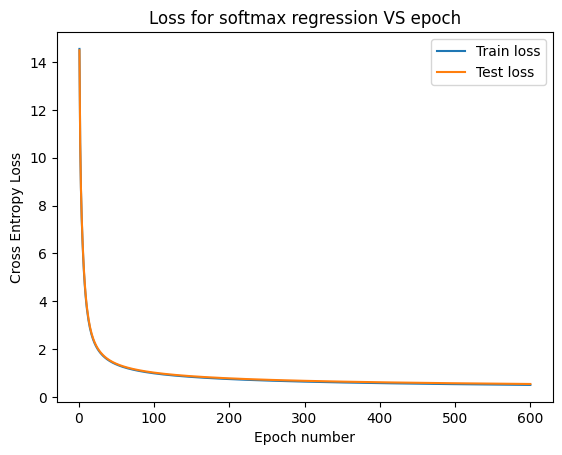

ACC for multi-class clasification using softmax regression = 0.8804

Confusion matrix for the multi-class clasification using softmax regression:
[[ 885    0    8    1    2   20    9    2   15    1]
 [   0 1068    3    5    4    4    4    5   28    2]
 [  10   10  885   19   20    7   19   14   41    7]
 [   4    7   34  862    4   41    9   20   21   12]
 [   4    9    9    1  862    3    9   10   10   43]
 [  13    4   12   43   11  775   18   10   44   13]
 [  10    3   27    2   11   19  938    3    6    0]
 [   2    5   17    7   12    2    0  945    6   37]
 [   5   20   18   41    7   52   10    7  799   22]
 [  16    5    4   12   65    3    1   44   17  785]]

True Positive Rate (TPR) for Each digit:
digit 0: TPR = 0.9326
digit 1: TPR = 0.9443
digit 2: TPR = 0.8702
digit 3: TPR = 0.8681
digit 4: TPR = 0.8637
digit 5: TPR = 0.8369
digit 6: TPR = 0.9223
digit 7: TPR = 0.8915
digit 8: TPR = 0.8095
digit 9: TPR = 0.8514

Accuracy for digit 0: 98.78%
Confusion Matrix for digit 0:
[

In [ ]:
print("Results for softmax regression:")
plot_losses(train_losses, test_losses)
show_results_softmax_regression(X_test, W_optimal ,Y_test)

## **Discussion**

The overall accuracy achieved for the multi-class classification using gradient descent with softmax regression is 87.79%, indicating a robust performance in distinguishing between the ten digits. The confusion matrix provides a detailed breakdown of the model's predictions for each class.

Upon closer inspection of the confusion matrix, it is evident that the model performs exceptionally well in correctly classifying digits 0, 1, and 6, with accuracies exceeding 98%. Digits 2, 4, and 7 also demonstrate high accuracies, hovering around 97-98%. However, the model faces relatively more challenges with digits 5, 8, and 9, where accuracies drop slightly to the mid-90s. These discrepancies may stem from the inherent complexities in distinguishing visually similar digits.

Analyzing the true positive rates (TPR) for each digit further emphasizes the model's strengths and weaknesses. Notably, digits 0 and 1 exhibit TPRs above 93%, reinforcing the model's proficiency in correctly identifying these digits. On the other hand, digits 5 and 8 display lower TPRs, indicating areas where the model may benefit from further refinement.


# **Linear Regression**


Linear regression, a foundational algorithm in machine learning, is conventionally associated with regression tasks; however, its adaptability extends beyond predicting continuous values.
In the context of the multi-class classification, the application of linear regression on the MNIST dataset may seem unconventional yet offers an insightful perspective.

In a formal context, when presented with input images represented by X and their corresponding labels denoted as y, the least squares solution is expressed as W = (X^T * X)^-1 * X^T * y.
Subsequently, for a novel input image X_t, the anticipated scores for each class are determined through the equation y_pred = X_t * W.
Notably, the values within y_pred are continuous, not restricted to integers. To finalize predictions for each image, the argmax function is applied to the vector of predictions associated with each image.

In [ ]:
def least_squares(X, y):

    # Calculate the least squares solution
    Weights = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

    return Weights

def linear_regression_predict(X, Weights):

    # Predict labels using the learned weights
    y_pred = X.dot(Weights)

    return y_pred




In [ ]:
def calculate_mse(Y, y_pred):

  # Calculate MSE for two vectors
  mse = np.mean((Y - y_pred) ** 2)
  return mse


def calculate_acc(Y, y_pred):

  # Calculate Accuracy for two one hot encoded vectors
  acc = 100 * np.sum(np.all(Y == y_pred, axis=1)) / Y.shape[0]
  return acc

def show_results_linear_regression(X_train, Y_train_oh, X_test, Y_test_oh):

  # Finf optimal weights using least squares
  W = least_squares(X_train, Y_train_oh)

  # Predict labels on test set
  y_pred = linear_regression_predict(X_test, W)

  # Transofrm prediction one hot to match predictions
  y_pred_one_hot = np.zeros_like(y_pred)
  y_pred_one_hot[np.arange(len(y_pred)), y_pred.argmax(axis=1)] = 1


  mse = calculate_mse(Y_test_oh, y_pred_one_hot)
  acc = calculate_acc(Y_test_oh, y_pred_one_hot)
  print(f"\nIn-Sample Erorr (MSE) for linear regresson: {mse}")
  print (f"ACC for multi-class clasification using linear regression = {acc}%")



  # Calculate confusion matrix
  Y = np.argmax(Y_test_oh, axis=1)
  y_pred_labels = np.argmax(y_pred_one_hot, axis=1)
  conf_matrix = confusion_matrix(Y, y_pred_labels)
  print ("\nConfusion matrix for the multi-class clasification using linear regression:")
  print (conf_matrix)



## **Results**

In [ ]:
# Show results on test set

print("\n\nResults for linear regression:")
show_results_linear_regression(X_train, Y_train_oh, X_test,Y_test_oh)



Results for linear regression:

In-Sample Erorr (MSE) for linear regresson: 0.02994
ACC for multi-class clasification using linear regression = 85.03%

Confusion matrix for the multi-class clasification using linear regression:
[[ 904    0    1    2    5    6   10    1   12    2]
 [   0 1100    4    1    4    5    1    0    8    0]
 [  17   54  816   29   20    2   28   11   48    7]
 [   8   22   31  848    2   23   13   19   24   24]
 [   2   23    9    2  836   10    4    6    8   60]
 [  26   14    3   82   20  690   30   11   39   28]
 [  19   12   12    0   18   19  933    0    6    0]
 [   7   35    5   10   33    1    0  894    1   47]
 [   9   70   10   46   21   38   11    8  737   31]
 [  20   12    3   16   70    2    0   79    5  745]]


## **Discussion**

In this section, we compare the results of the multi-class perceptron, linear  regression and softmax regression models for the multi-class classification of the MNIST dataset.





**Multi-Class Perceptron:**

The multi-class perceptron introduces a unique two-step approach. Initially, 10 binary perceptrons are trained, each specialized in distinguishing one specific digit from the others. The weights learned by these binary perceptrons are then utilized as initial weights for a multi-class perceptron, which integrates this knowledge for the final classification.

This approach strikes a balance between simplicity and performance. The multi-class perceptron achieves a competitive accuracy of 88.20% on the training data and 87.94% on the test data. It leverages the feature learning from binary perceptrons effectively, showcasing its ability to capture the essential patterns in the data.

However, challenges persist, particularly in distinguishing visually similar digits such as 5, 8, and 9. This indicates areas for potential improvement, and further refinement of the multi-class perceptron, or exploration of alternative architectures, could enhance its performance.

**Linear Regression:**

Linear regression, being a simple and straightforward model, is known for its ease of implementation and interpretation. In the context of our mission, linear regression achieves a respectable accuracy of 85.25%. However, its simplicity comes with limitations, particularly when it comes to capturing the complex relationships inherent in handwritten characters. Linear regression might struggle with the intricate details and variations present in the different digits.

In terms of the confusion matrix, we observe challenges in distinguishing visually similar digits, such as 5 and 8. This suggests that linear regression may face difficulties in making subtle distinctions required for accurate digit recognition.



**Softmax Regression:**

Softmax regression, designed explicitly for multi-class classification, provides a more probabilistic framework. It models the probabilities of each class and selects the one with the highest probability as the predicted label. In the case of the MNIST dataset, softmax regression achieves the highest overall accuracy of 87.79%. The probabilistic nature of softmax regression allows it to better handle the complexities of distinguishing between visually similar digits.

Examining the confusion matrix, softmax regression showcases higher true positive rates across all digits, indicating its effectiveness in capturing the nuances of digit recognition. It excels in scenarios where understanding the certainty of predictions is crucial. This conclusion arises organically from the manner in which the In-Sample Error is computed. In cases where the algorithm predicts an instance as correct, but it is, in fact, incorrect, a substantial error is added to the cumulative sum. Consequently, during gradient descent optimization, there is a tendency for the algorithm to mitigate false positive predictions, given the significant impact these errors have on the overall error calculation.

